<a href="https://colab.research.google.com/github/asdfasdf0311/2023DataminingStudy/blob/main/ydms_week2_Kmeans(framingham).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YDMS 2주차 차원축소_Kmeans**(framingham) - 주하연

In [ ]:
from google.colab import drive #구글 드라이브에 데이터를 저장해서 데이터를 불러왔다.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/ydms/week2/framingham.csv')#데이터불러오기

In [ ]:
type(dat)

pandas.core.frame.DataFrame

In [ ]:
dat.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#결측치가 있는 값들을 평균으로 대체
dat['cigsPerDay'] = dat['cigsPerDay'].fillna(dat['cigsPerDay'].mean())
dat['totChol'] = dat['totChol'].fillna(dat['totChol'].mean())
dat['BMI'] = dat['BMI'].fillna(dat['BMI'].mean())
dat['heartRate'] = dat['heartRate'].fillna(dat['heartRate'].mean())
dat['glucose'] = dat['glucose'].fillna(dat['glucose'].mean())

In [ ]:
#범주형 자료는 결측치가 있는 행을을 제거
dat = dat.dropna(subset=['education','BPMeds'])
dat

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,No,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,female,46,2.0,No,0.0,0.0,0,No,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,male,48,1.0,Yes,20.0,0.0,0,No,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,female,61,3.0,Yes,30.0,0.0,0,No,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,female,46,3.0,Yes,23.0,0.0,0,No,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,male,51,3.0,Yes,43.0,0.0,0,No,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,female,44,1.0,Yes,15.0,0.0,0,No,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,female,52,2.0,No,0.0,0.0,0,No,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,male,40,3.0,No,0.0,0.0,0,No,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [ ]:
null_data=dat.isnull().sum().to_frame('null_count') #모든 결측치가 정제되었음을 볼 수 있다.
null_data

,null_count
Sex,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
del dat['Sex']

In [ ]:
del dat['currentSmoker']

In [ ]:
del dat['diabetes']

데이터분포확인

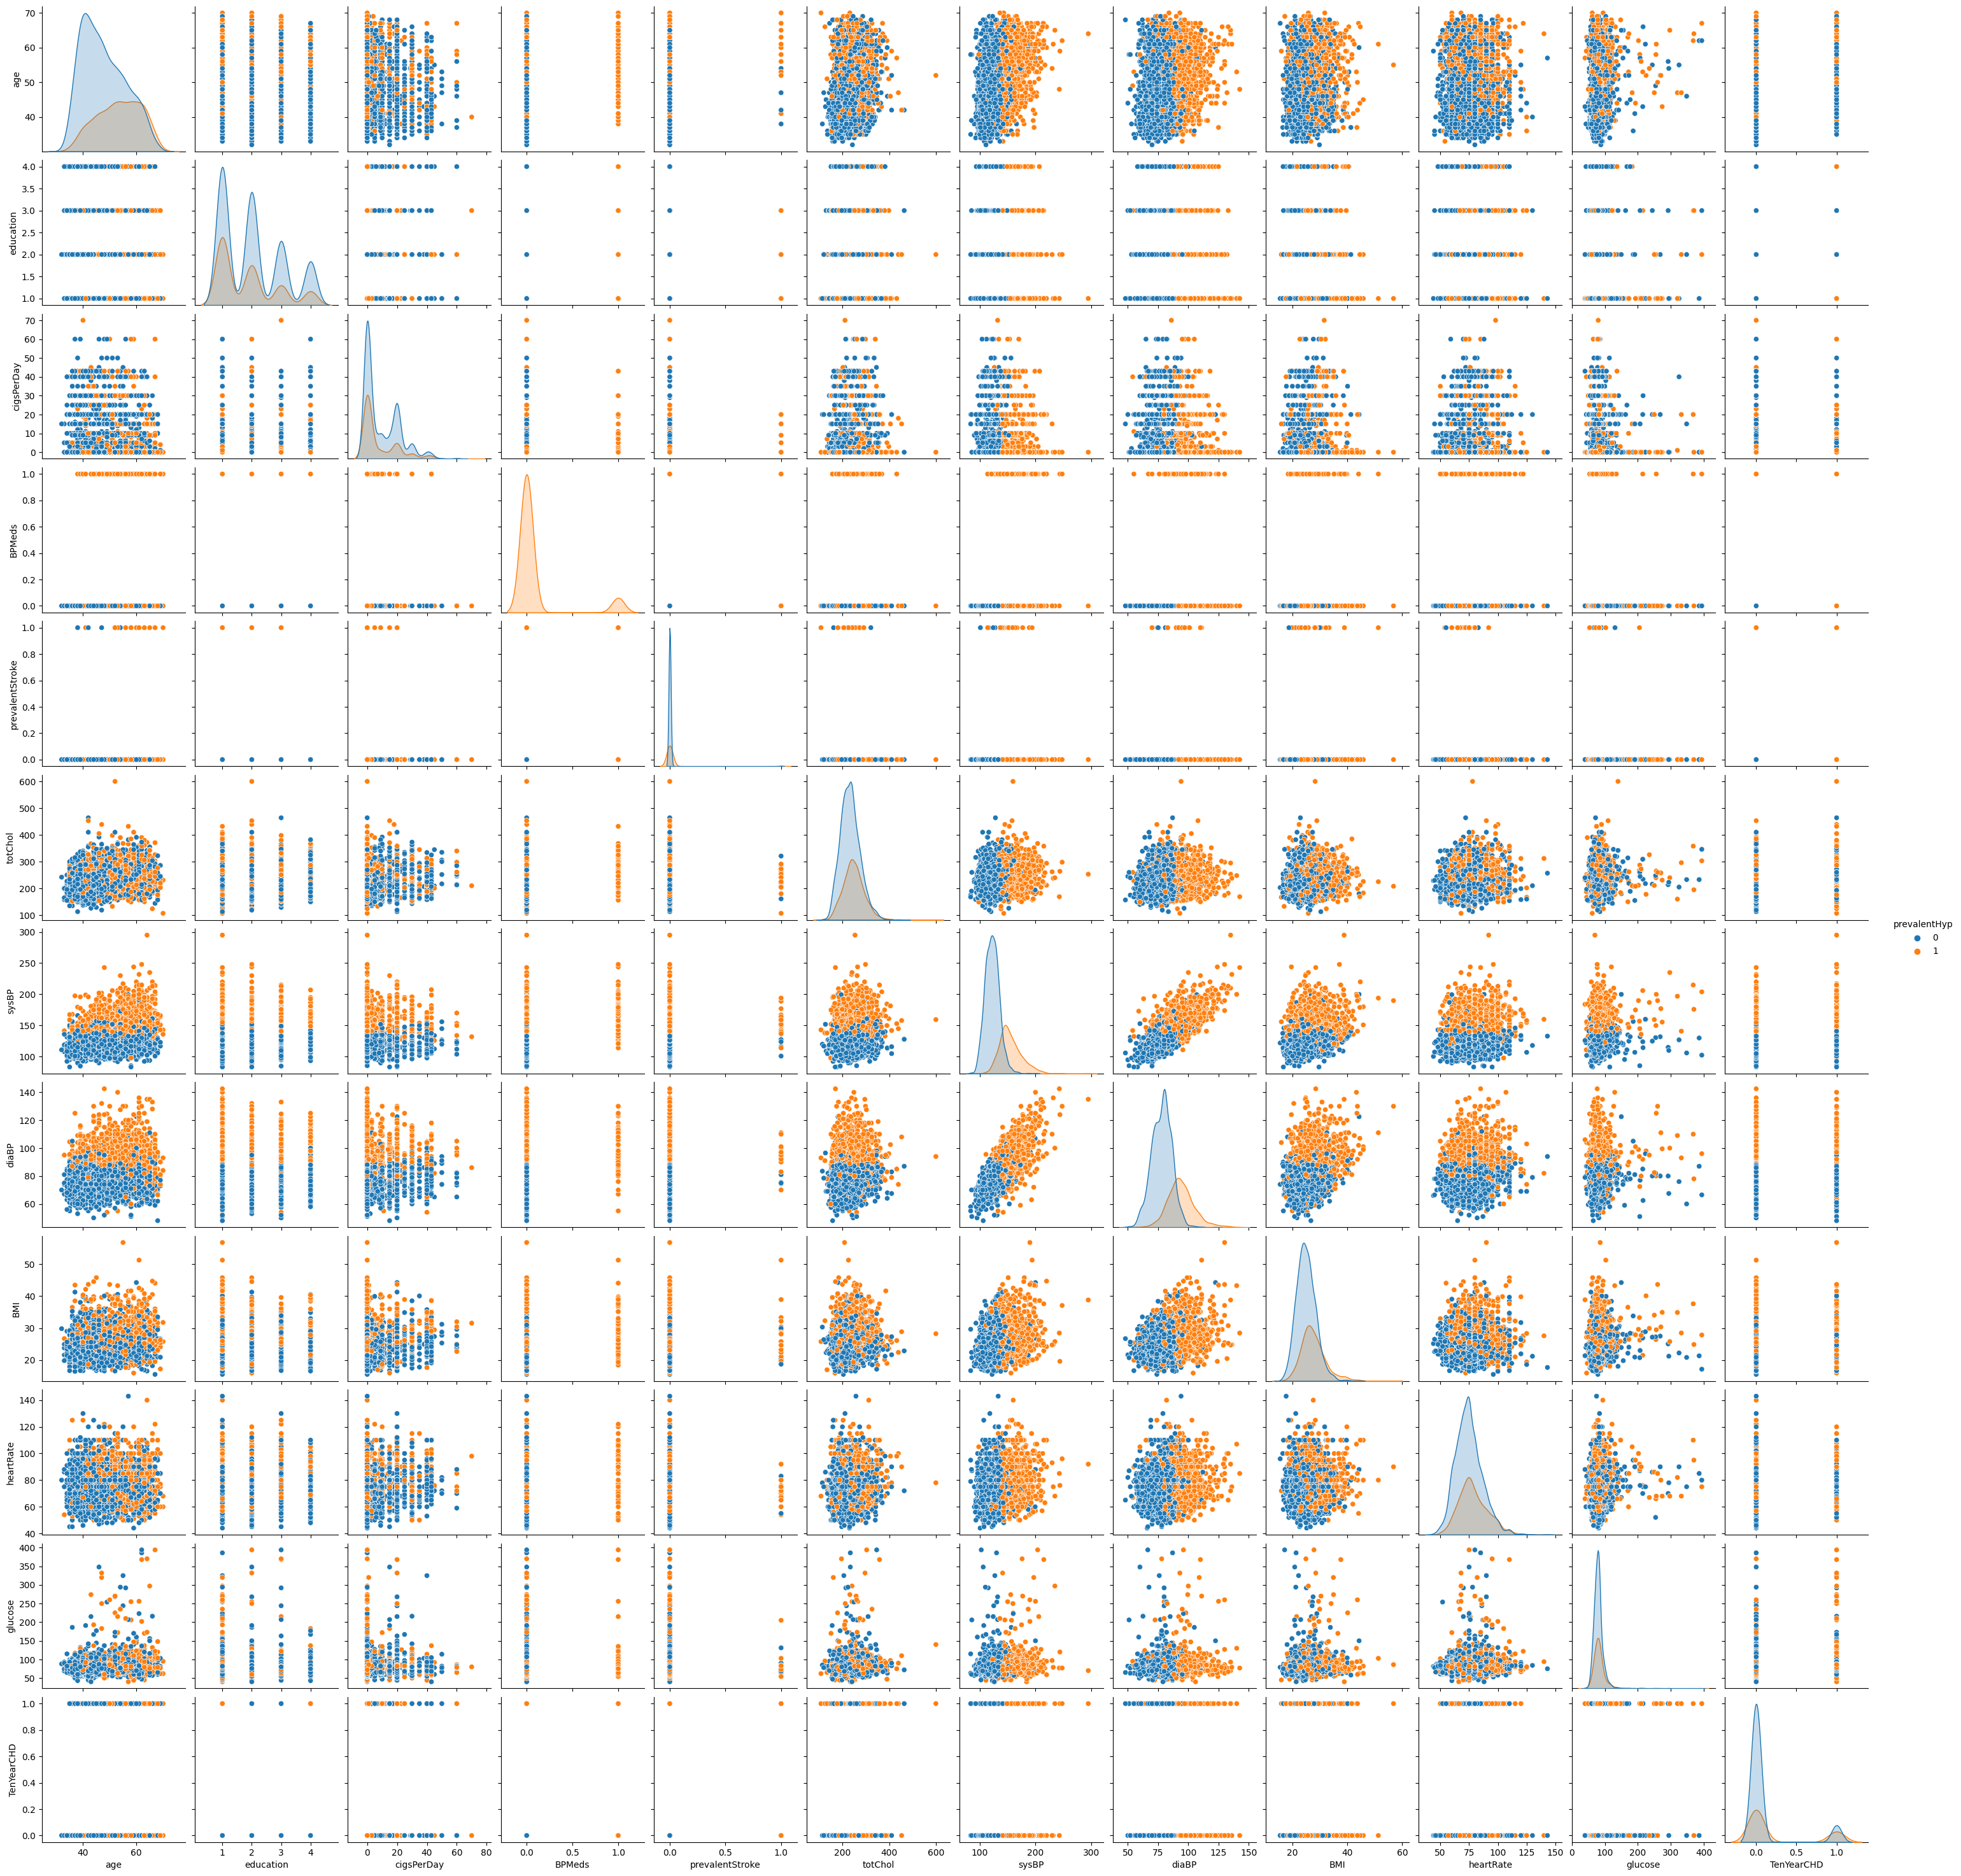

In [ ]:
sns.pairplot(dat, hue='prevalentHyp', height=2.5)
plt.show()

### Kmeans

In [ ]:
kmeans = KMeans(n_clusters=7, random_state =0).fit(dat)#수치형 자료로만 진행했다..

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_ #row마다 어떤 군집으로 분류 되었는지 라벨링

array([2, 1, 1, ..., 4, 0, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_#군집의 중심점을 수치적으로 출력해 좌표값 확인

array([[5.28114943e+01, 1.79080460e+00, 7.78626149e+00, 5.51724138e-02,
        1.14942529e-02, 2.02763218e+02, 1.53732184e+02, 9.33885057e+01,
        2.72874308e+01, 7.79974229e+01, 8.39510987e+01, 2.50574713e-01],
       [4.81574803e+01, 2.07952756e+00, 1.00795650e+01, 7.08661417e-03,
        1.57480315e-03, 2.30890381e+02, 1.22287008e+02, 7.82767717e+01,
        2.52130668e+01, 7.44425197e+01, 7.92911546e+01, 1.11023622e-01],
       [4.40426829e+01, 2.07317073e+00, 9.32076067e+00, 6.09756098e-03,
        4.87804878e-03, 1.83826829e+02, 1.17626829e+02, 7.58652439e+01,
        2.42047356e+01, 7.33634146e+01, 7.83662323e+01, 6.95121951e-02],
       [5.31315789e+01, 1.96240602e+00, 7.60533011e+00, 5.26315789e-02,
        3.75939850e-03, 3.32342105e+02, 1.41776316e+02, 8.63609023e+01,
        2.64641008e+01, 7.85939850e+01, 8.17153124e+01, 1.95488722e-01],
       [5.08494354e+01, 1.95357591e+00, 9.32249647e+00, 2.00752823e-02,
        6.27352572e-03, 2.74647428e+02, 1.27606650e+02, 8.15

시각화....음........